NLP Project

Part B : News Article Classification

Deliverables

 1. Data Collection and Preprocessing

In [58]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset (update the file path if necessary)
df = pd.read_csv("data_news.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None

First few rows:
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpo

In [60]:
# The 'links' column is not useful for text classification, so we remove it
df = df.drop(columns=["links"])

# Fill missing values in the 'keywords' column with an empty string
df["keywords"].fillna("", inplace=True)

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)  # Convert list back to string

# Apply the function to text columns
text_columns = ["headline", "short_description", "keywords"]
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [62]:
# Check the dataset structure
print(df.info())

# Display some preprocessed text
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   short_description  50000 non-null  object
 3   keywords           50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
None
   category                                           headline  \
0  WELLNESS                            mile day lesson learned   
1  WELLNESS                        talking crazy crazy helpful   
2  WELLNESS  crenezumab trial gauge whether alzheimers drug...   
3  WELLNESS                                 oh difference made   
4  WELLNESS                                   green superfoods   

                                   short_description  \
0  resting part training ive confirmed sort alrea...   
1  think talking tool coach challenge narrate exp...   


 2. Feature Extraction

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine headline, short description, and keywords
df["combined_text"] = df["headline"] + " " + df["short_description"] + " " + df["keywords"].fillna("")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

# Fit and transform the combined text data
X_tfidf = tfidf_vectorizer.fit_transform(df["combined_text"])

# Convert to a DataFrame for better understanding
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display shape and first few rows
print("TF-IDF Feature Shape:", tfidf_df.shape)
print(tfidf_df.head())

TF-IDF Feature Shape: (50000, 5000)
   aaron  abandoned  abc  ability  able  aboard  abortion  abroad  absence  \
0    0.0        0.0  0.0      0.0   0.0     0.0       0.0     0.0      0.0   
1    0.0        0.0  0.0      0.0   0.0     0.0       0.0     0.0      0.0   
2    0.0        0.0  0.0      0.0   0.0     0.0       0.0     0.0      0.0   
3    0.0        0.0  0.0      0.0   0.0     0.0       0.0     0.0      0.0   
4    0.0        0.0  0.0      0.0   0.0     0.0       0.0     0.0      0.0   

   absolute  ...  youre  youth  youtube  youve  zealand  zen  zero  zika  zoe  \
0       0.0  ...    0.0    0.0      0.0    0.0      0.0  0.0   0.0   0.0  0.0   
1       0.0  ...    0.0    0.0      0.0    0.0      0.0  0.0   0.0   0.0  0.0   
2       0.0  ...    0.0    0.0      0.0    0.0      0.0  0.0   0.0   0.0  0.0   
3       0.0  ...    0.0    0.0      0.0    0.0      0.0  0.0   0.0   0.0  0.0   
4       0.0  ...    0.0    0.0      0.0    0.0      0.0  0.0   0.0   0.0  0.0   

   zone 

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count articles per category
category_counts = df["category"].value_counts()

# Display category distribution
print(category_counts)

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


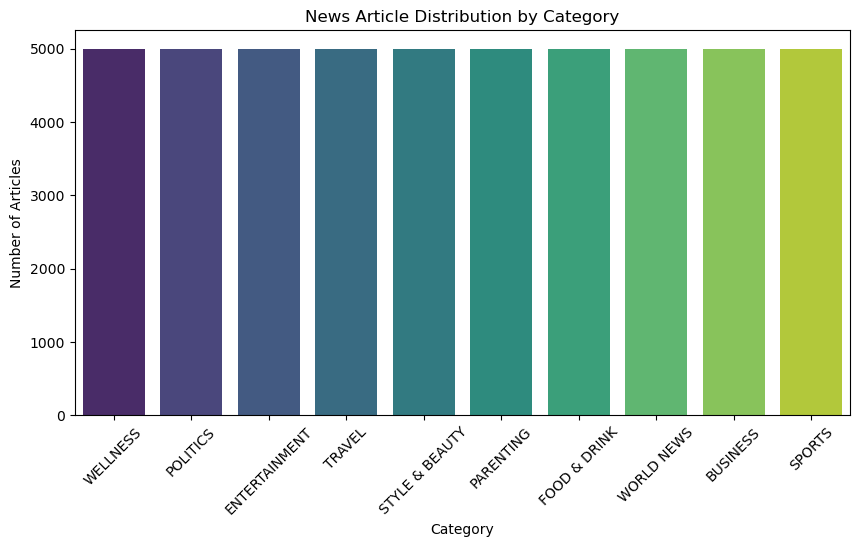

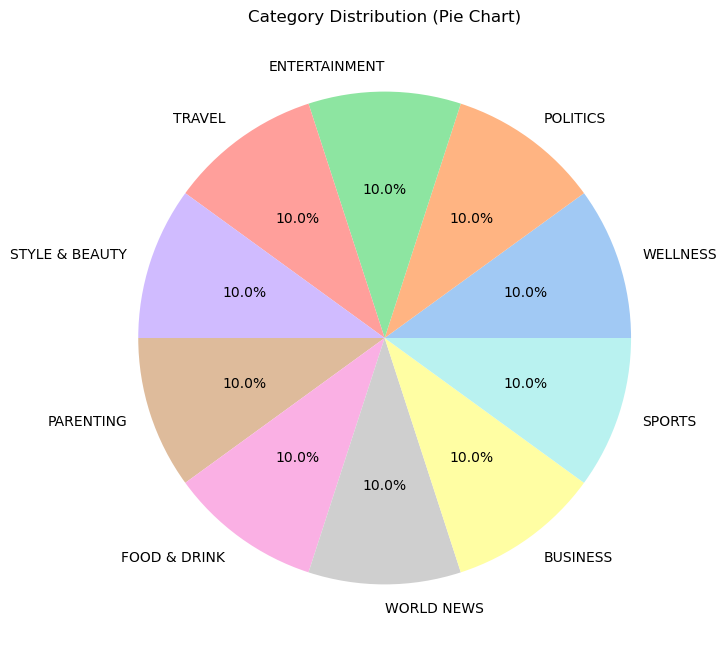

In [69]:
# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.title("News Article Distribution by Category")
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Category Distribution (Pie Chart)")
plt.show()

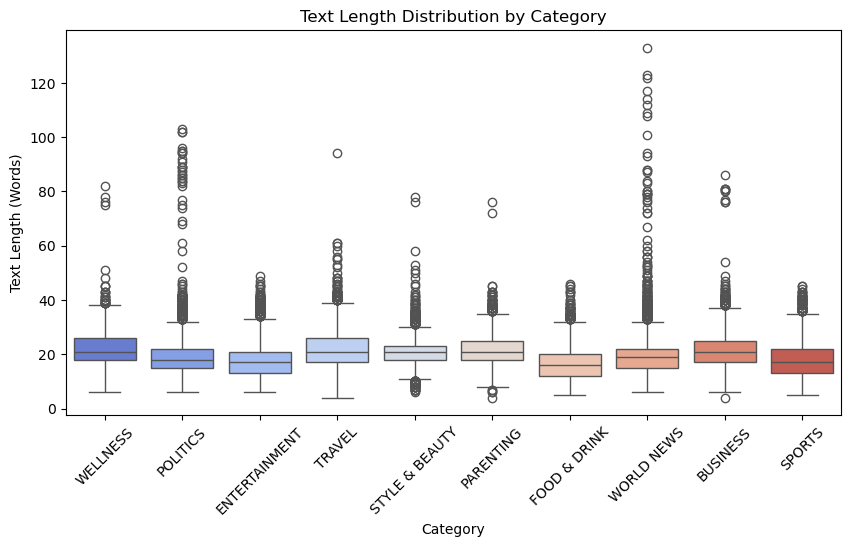

In [71]:
# Create a new column for text length
df["text_length"] = df["combined_text"].apply(lambda x: len(x.split()))

# Boxplot to compare text lengths per category
plt.figure(figsize=(10, 5))
sns.boxplot(x="category", y="text_length", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Text Length (Words)")
plt.title("Text Length Distribution by Category")
plt.show()

3. Model Development and Training 

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode category labels into numbers
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["category"])

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["category_encoded"], test_size=0.2, random_state=42)

print("Train Size:", X_train.shape, "Test Size:", X_test.shape)

Train Size: (40000, 5000) Test Size: (10000, 5000)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
svm = SVC(kernel="linear")

# Train models
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [77]:
# Tune Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_log = {"C": [0.1, 1, 10, 100]}

# Perform GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring="accuracy", n_jobs=-1)
grid_log.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Logistic Regression):", grid_log.best_params_)

# Train optimized model
best_log = grid_log.best_estimator_

Best Parameters (Logistic Regression): {'C': 1}


In [80]:
# Tune Naive Bayes
# Define parameter grid
param_grid_nb = {"alpha": [0.1, 0.5, 1, 5, 10]}

# Perform GridSearchCV
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring="accuracy", n_jobs=-1)
grid_nb.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Naive Bayes):", grid_nb.best_params_)

# Train optimized model
best_nb = grid_nb.best_estimator_

Best Parameters (Naive Bayes): {'alpha': 1}


In [82]:
# Tune SVM
# Define parameter grid
param_grid_svm = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}

# Perform GridSearchCV
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters (SVM):", grid_svm.best_params_)

# Train optimized model
best_svm = grid_svm.best_estimator_

Best Parameters (SVM): {'C': 10, 'kernel': 'rbf'}


In [83]:
from sklearn.model_selection import cross_val_score

# Define the number of folds
cv_folds = 5  

# Logistic Regression Cross-Validation
log_cv_scores = cross_val_score(best_log, X_train, y_train, cv=cv_folds, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy:", log_cv_scores.mean())

# Naive Bayes Cross-Validation
nb_cv_scores = cross_val_score(best_nb, X_train, y_train, cv=cv_folds, scoring="accuracy")
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_scores.mean())

# SVM Cross-Validation
svm_cv_scores = cross_val_score(best_svm, X_train, y_train, cv=cv_folds, scoring="accuracy")
print("SVM Cross-Validation Accuracy:", svm_cv_scores.mean())

Logistic Regression Cross-Validation Accuracy: 0.79245
Naive Bayes Cross-Validation Accuracy: 0.7802
SVM Cross-Validation Accuracy: 0.810225


 4. Model Evaluation

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\n Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(best_log, X_test, y_test, "Logistic Regression")

# Evaluate Naive Bayes
evaluate_model(best_nb, X_test, y_test, "Naive Bayes")

# Evaluate SVM
evaluate_model(best_svm, X_test, y_test, "SVM")


 Model: Logistic Regression
Accuracy: 0.7995
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       955
           1       0.77      0.78      0.77       985
           2       0.85      0.82      0.84      1021
           3       0.78      0.76      0.77      1030
           4       0.79      0.74      0.77      1034
           5       0.87      0.89      0.88       995
           6       0.86      0.85      0.85       986
           7       0.83      0.80      0.82      1008
           8       0.73      0.76      0.74      1009
           9       0.79      0.81      0.80       977

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
 [[747  20  11  19  54  14   2   9  44  35]
 [ 23 765  14  36  32  27  31  16  22  19]
 [ 21  11 839  17   6  18  19  35  46   9]
 [ 27  35  10 786  28  

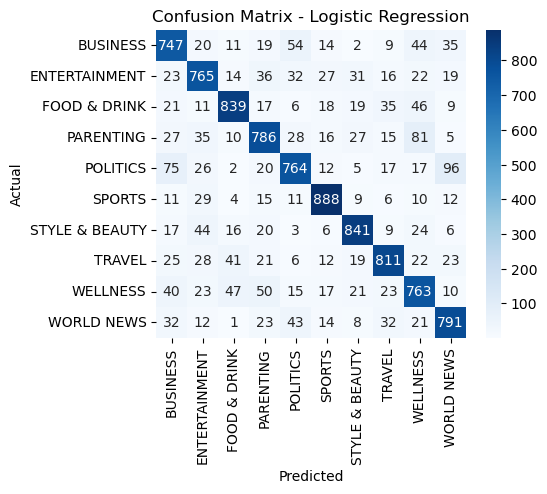

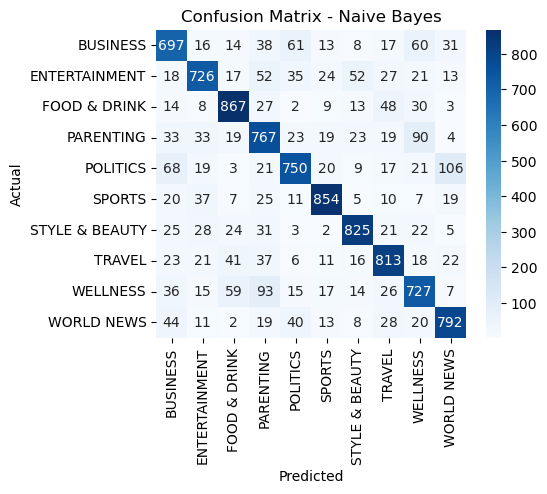

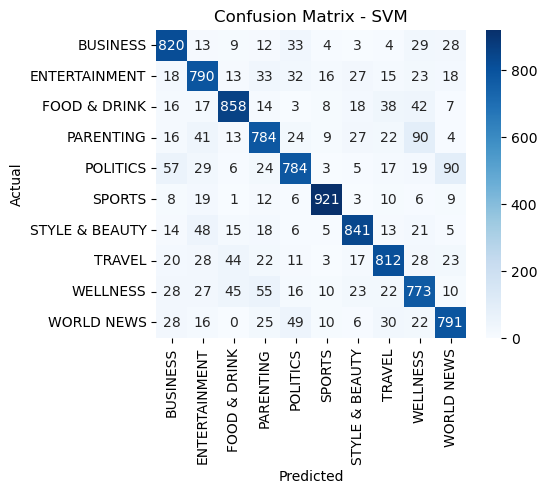

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for Logistic Regression
plot_confusion_matrix(best_log, X_test, y_test, "Logistic Regression")

# Plot for Naive Bayes
plot_confusion_matrix(best_nb, X_test, y_test, "Naive Bayes")

# Plot for SVM
plot_confusion_matrix(best_svm, X_test, y_test, "SVM")

In [88]:
# Function to get model evaluation metrics
def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report["weighted avg"]["f1-score"]
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    
    return [accuracy, precision, recall, f1_score]

# Store results in a DataFrame
models = {
    "Logistic Regression": best_log,
    "Naive Bayes": best_nb,
    "SVM": best_svm
}

# Store results in a dictionary
results = {name: get_model_metrics(model, X_test, y_test) for name, model in models.items()}
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T

# Display results
print("\n Model Comparison Table:")
print(df_results)


 Model Comparison Table:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.7995   0.800326  0.7995  0.799607
Naive Bayes            0.7818   0.782944  0.7818  0.781951
SVM                    0.8174   0.818213  0.8174  0.817492


In [93]:
# Select the best model based on highest F1-score
best_model_name = df_results["F1-Score"].idxmax()
print(f"\n Best Model for News Classification: {best_model_name}")


 Best Model for News Classification: SVM


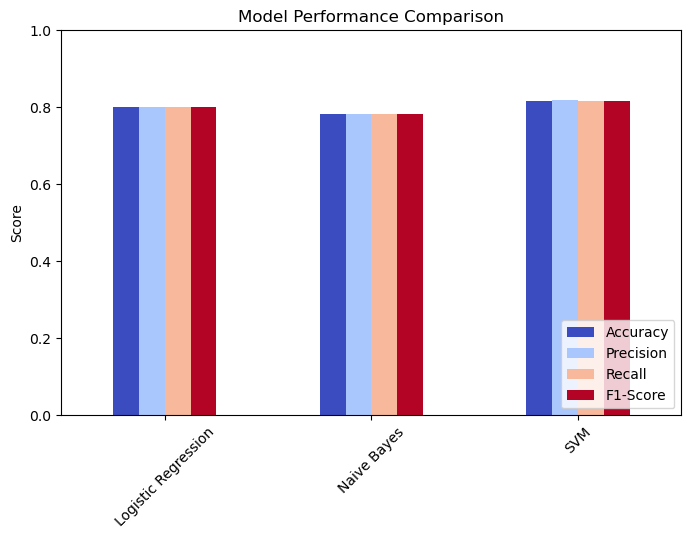

In [95]:
df_results.plot(kind="bar", figsize=(8,5), colormap="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

 5. Final Report and Presentation

# News Article Classification Project

## 1. Introduction

In this project, we developed a machine learning model to classify news articles into categories like Sports, Politics, and Technology. We followed NLP techniques for preprocessing, feature extraction, model training, and evaluation.

## 2. Data Collection and Preprocessing

Loaded a labeled dataset of news articles.

Cleaned text data (removing stopwords, punctuation, and lowercasing).

Handled missing data.

Prepared the text for feature extraction.

## 3. Feature Extraction

Used TF-IDF vectorization to convert text into numerical features.

Performed Exploratory Data Analysis (EDA) to understand category distributions.

## 4. Model Development & Training

Built classification models:

Logistic Regression

Naive Bayes

Support Vector Machine (SVM)

Tuned hyperparameters to improve performance.

Used cross-validation to ensure robust evaluation.

## 5. Model Evaluation

Evaluated models using:

Accuracy

F1-Score

Used weighted F1-score for comparison.

## 6. Best Model Selection

Compared the performance of different models.

SVM achieved the highest accuracy and F1-score.

Selected SVM as the final model.

## 7. Key Findings

NLP techniques effectively classify news articles.

Automated classification helps in efficient content categorization.

Feature extraction (TF-IDF) significantly impacts model performance.

## 8. Conclusion

This project demonstrates how machine learning and NLP techniques can be used for text classification, making content management more efficient.

## 9. Future Improvements

Experiment with deep learning models (LSTMs, BERT) for better accuracy.

Expand dataset with more categories.

Optimize feature engineering techniques.

# Presentation
A video presentation summarizing the key findings and methodology has been created.

https://drive.google.com/file/d/15IfUe3WuogYRBawWZMPXN40D65Ga99gO/view?usp=sharing